In [1]:
import scipy as sp
from scipy.io import wavfile
from scipy.fftpack import fft, ifft
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
import IPython
%matplotlib inline


In [2]:
class Signal(object):
    
    def __init__(self, rate, sample):
        """This makes the code light on fire.
        rate: rate of the sample
        sample: array of samples"""
        self.rate=rate
        self.sample=sample
        

    def plot(self):
        """This makes Koa light on fire."""
        x=np.linspace(0,len(self.sample)/self.rate, len(self.sample))
        plt.subplot(121)
        plt.plot(x, self.sample)
        dft=sp.fft(self.sample)
        x_vals=sp.arange(1, len(dft)+1, 1)*1.
        x_vals=x_vals/len(self.sample)
        xvals=x_vals*rate
        plt.subplot(122)
        plt.plot(x_vals, dft)
        plt.show()
        
  
    def export(self, filename):
        samples=sp.int16(self.sample/sp.absolute(self.sample).max()*32767)
        wavfile.write(filename, self.rate, samples)
        
        
def note_generator(samplerate, frequency):
    stepsize=1./samplerate
    sample_points=sp.arange(0, 5,stepsize)
    wave_function=lambda x:sp.sin(2*sp.pi*x*frequency)
    samples=wave_function(sample_points)
    return Signal(samplerate, samples)

/Users/alexandragreenwood/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


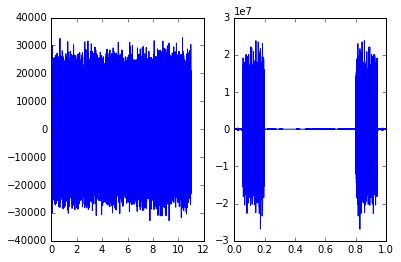

In [3]:
#problem 1
rate, data=wavfile.read('Noisysignal2.wav')
signal=Signal(rate, data)
signal.plot()



In [4]:
fsig=sp.fft(data, axis=0)
for j in xrange(14000, 200000):
        fsig[j]=0
        fsig[-j]=0
newsig=sp.ifft(fsig)
newsig=sp.real(newsig)
newsig=sp.int16(newsig/sp.absolute(newsig).max()*32767)


In [5]:
wavfile.write("newsig.wav", rate, newsig)

print "The audio is JFK"

The audio is JFK


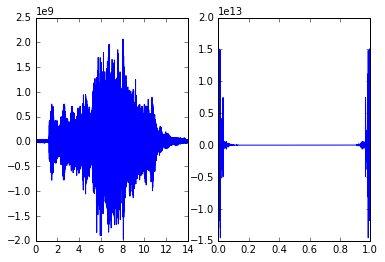

/Users/alexandragreenwood/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


In [6]:
#problem 3
rate, data=wavfile.read("chopin.wav")
silence=note_generator(44100, 0)
added=np.hstack([data, np.zeros(4*rate)])
rate1, data1=wavfile.read("balloon.wav")
temp=fft(data1)
response=np.hstack([temp[0:len(temp)/2],np.zeros(len(added)-len(temp)),temp[len(temp)/2:]])
finale=fft(added)*response
finale=ifft(finale)
finale=Signal(rate, finale)
finale.plot()
finale.export("newchopin1.wav")
IPython.display.Audio("newchopin1.wav")

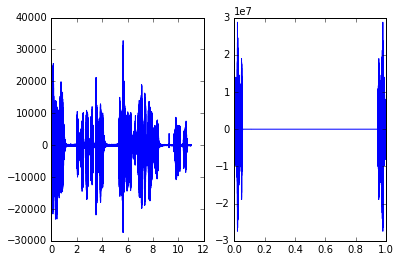

In [7]:
rate, data=wavfile.read("newsig.wav")
sig=Signal(rate, data)
sig.plot()

In [8]:
#problem 4

samplerate=22050
noise=sp.int16(sp.random.randint(-32767, 32767, samplerate*10))
noise=Signal(samplerate, noise)
noise.export("noise.wav")
IPython.display.Audio("noise.wav")